In [46]:
import bs4
import requests
import numpy as np

In [144]:
#DEL 1
r = requests.get('https://www.komplett.dk/category/21064/mobil/mobiltelefoner')
r.raise_for_status()
soup = bs4.BeautifulSoup(r.text, 'html.parser')

span_elem = soup.select('span')

##print(span_elem.get('class'))

elems_price = soup.findAll('span',{'class':'product-price-now'})

elems_name = soup.findAll('div',{'class':'text-content'})
elems_name = soup.select('div[class=text-content] > h2')

price_names = [(price.getText(),names.getText()) for price in elems_price for names in elems_name]



<function matplotlib.pyplot.show(*args, **kw)>

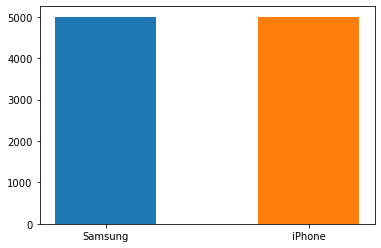

In [154]:
#DEL 2
%matplotlib notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

price_make = [(int(key[:-2].replace('.','')),value.split()[0]) for key,value in price_names if 'Samsung' in value or 'iPhone' in value]


data = np.array(price_make)
##print(data)
sam_mask = (data[:,1] == 'Samsung')
ip_mask = (data[:,1] == 'iPhone')


sam_prices = np.array(data[sam_mask][:,0])
sam_prices = sam_prices.astype(int)


ip_prices = np.array(data[ip_mask][:,0])
ip_prices = ip_prices.astype(int)


avg_sam = np.sum(sam_prices)/sam_prices.size
avg_ip = np.sum(ip_prices)/ip_prices.size

plt.bar(['Samsung'],avg_sam, width=0.5,align='center')
plt.bar(['iPhone'],avg_ip,width=0.5,align='center')
plt.show

#har ingen ide om hvorfor at gennemsnits priserne er identisk..

In [152]:
#DEL 3

_r = requests.get('https://www.telia.dk/privat/webshop/mobiler/?page=4')
_r.raise_for_status()
_soup = bs4.BeautifulSoup(_r.text, 'html.parser')

span_elem = _soup.findAll('div',{'class':'cm-c-product-card-simple__top'})
print(span_elem)
##print(span_elem.get('class'))



##tel_elems_price = _soup.findAll('span',{'class':'cm-c-product-card-simple__bottom'})
##tel_elems_price = soup.select('div[class=cm-c-product-card-simple__bottom] > p > span')

##print(tel_elems_price)

tel_elems_name = _soup.findAll('div',{'class':'cm-c-product-card-simple__top'})
tel_elems_name = _soup.select('div[class=cm-c-product-card-simple__brand] > p')
print(tel_elems_name)

tel_price_names = [(price.getText(),names.getText()) for price in tel_elems_price for names in tel_elems_name]
print(tel_price_names)

#for ingen data ud?

[]
[]
[]
